In [13]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

# convolutional autoencoder in keras

import os
#os.environ["KERAS_BACKEND"] = "tensorflow"

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from keras import backend as K

import matplotlib.pyplot as plt
# %matplotlib inline

from keras.datasets import mnist 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def own_kullback_leibler_divergence(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.sum(y_true * K.log(y_true / y_pred), axis=-1)

def own_mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def own_loss(y_true, y_pred):
    return own_kullback_leibler_divergence(y_true, y_pred)*1.0+own_mean_squared_error(y_true, y_pred)

# utility function for showing images
def show_imgs(x_test, decoded_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()


input_img = Input(shape=(28, 28,1)) # 1ch=black&white, 28 x 28

conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img) #nb_filter, nb_row, nb_col
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(4, (3, 3), activation='relu', padding='same')(pool1)
encoded = MaxPooling2D(pool_size=(2, 2))(conv2)

print("shape of encoded", K.int_shape(encoded))

conv3 = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
pool3 = UpSampling2D(size=(2, 2))(conv3)

conv4 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool3) 
pool4 = UpSampling2D(size=(2, 2))(conv4)

decoded = Conv2D(1, (5, 5), activation='sigmoid', padding='same')(pool4)
print("shape of decoded", K.int_shape(decoded))

autoencoderCONV = Model(input_img, decoded)
autoencoderCONV.compile(optimizer='adadelta', loss=own_loss)

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/255. # 0-1.に変換
x_test = x_test.astype('float32')/255. 

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)

autoencoderCONV.fit(x_train, x_train, epochs=2, batch_size=20,
               shuffle=True, validation_data=(x_test, x_test), verbose=1)
#               callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
### if you use TensorFlow backend, you can set TensorBoard callback

shape of encoded (None, 7, 7, 4)
shape of decoded (None, 28, 28, 1)
(60000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0167 - val_loss: 0.0047
Epoch 2/2
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0044 - val_loss: 0.0030


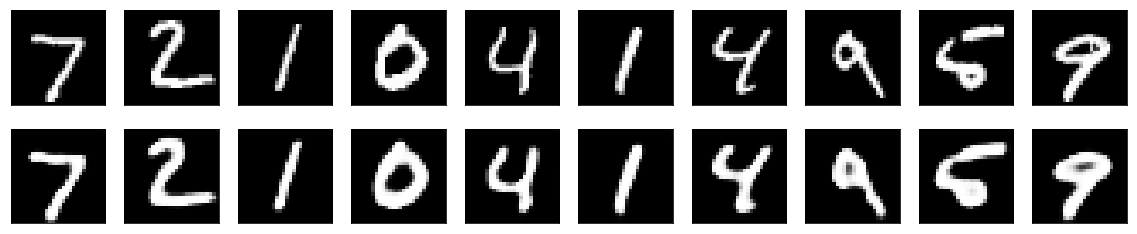

In [14]:
decoded_imgs = autoencoderCONV.predict(x_test)
# print "input (upper row)\ndecoded (bottom row)"
show_imgs(x_test, decoded_imgs)

In [16]:
autoencoderCONV.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 4)         292       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 7, 7, 4)           148       
_________________________________________________________________
up_sampling2d_21 (UpSampling (None, 14, 14, 4)         0         
__________

shape of encoded (None, 7, 7, 4)


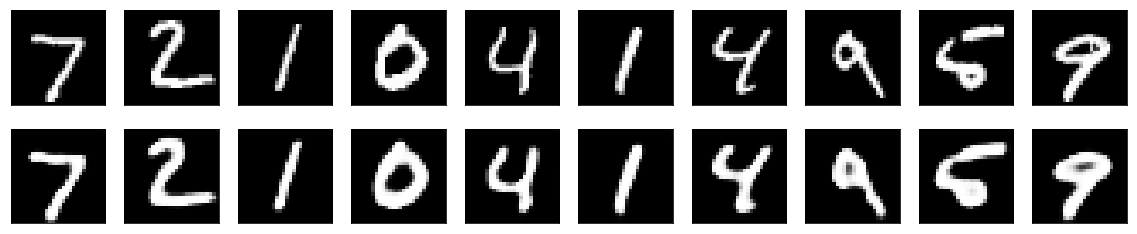

In [17]:
input_img_2 = Input(shape=(28, 28,1)) # 1ch=black&white, 28 x 28

conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img_2) #nb_filter, nb_row, nb_col
pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)

conv2_2 = Conv2D(4, (3, 3), activation='relu', padding='same')(pool1_2)
encoded_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)

enbig_1 = UpSampling2D(size=(2, 2))(encoded_2)
enbig_2 = UpSampling2D(size=(2, 2))(enbig_1)

print("shape of encoded", K.int_shape(encoded_2))

conv3_2 = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded_2)
pool3_2 = UpSampling2D(size=(2, 2))(conv3_2)

conv4_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool3_2) 
pool4_2 = UpSampling2D(size=(2, 2))(conv4_2)

decoded_2 = Conv2D(1, (5, 5), activation='sigmoid', padding='same')(pool4_2)

autoencoderCONV_2 = Model(input_img_2, decoded_2)
    
#for i in range(len(autoencoder_2.get_weights())):
#    print(len(autoencoder_2.get_weights()[i]))
 
for i in range(10):
    autoencoderCONV_2.layers[i].set_weights(autoencoderCONV.layers[i].get_weights())

decoded_imgs_2 = autoencoderCONV_2.predict(x_test)

show_imgs(x_test, decoded_imgs_2)

autoencoderCONV_3 = Model(input_img_2, enbig_2)

encoded_imgs_3 = autoencoderCONV_3.predict(x_test)

In [30]:
encoded_imgs_3.shape

(10000, 28, 28, 4)

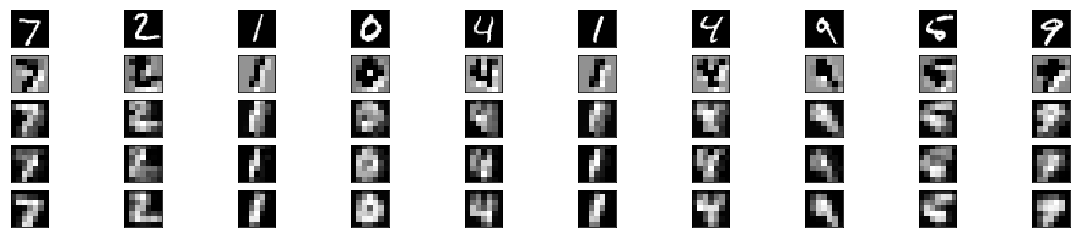

pups


In [31]:
def show_imgs_filter(x_test, encoded_imgs_3, n=10):
    
    en0=np.zeros((encoded_imgs_3.shape[0],encoded_imgs_3.shape[1],encoded_imgs_3.shape[2]))
    en1=np.zeros((encoded_imgs_3.shape[0],encoded_imgs_3.shape[1],encoded_imgs_3.shape[2]))
    en2=np.zeros((encoded_imgs_3.shape[0],encoded_imgs_3.shape[1],encoded_imgs_3.shape[2]))
    en3=np.zeros((encoded_imgs_3.shape[0],encoded_imgs_3.shape[1],encoded_imgs_3.shape[2]))

    for i in range(encoded_imgs_3.shape[0]):
        for j in range(encoded_imgs_3.shape[1]):
            for k in range(encoded_imgs_3.shape[2]):
                en0[i][j][k]=encoded_imgs_3[i][j][k][0]
                en1[i][j][k]=encoded_imgs_3[i][j][k][1]
                en2[i][j][k]=encoded_imgs_3[i][j][k][2]
                en3[i][j][k]=encoded_imgs_3[i][j][k][3]
    
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(5, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(5, n, i+ 1 +n)
            plt.imshow(en0[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
            ax = plt.subplot(5, n, i+ 1 +2*n)
            plt.imshow(en1[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
            ax = plt.subplot(5, n, i+ 1 +3*n)
            plt.imshow(en2[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
            ax = plt.subplot(5, n, i+ 1 +4*n)
            plt.imshow(en3[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

show_imgs_filter(x_test, encoded_imgs_3)

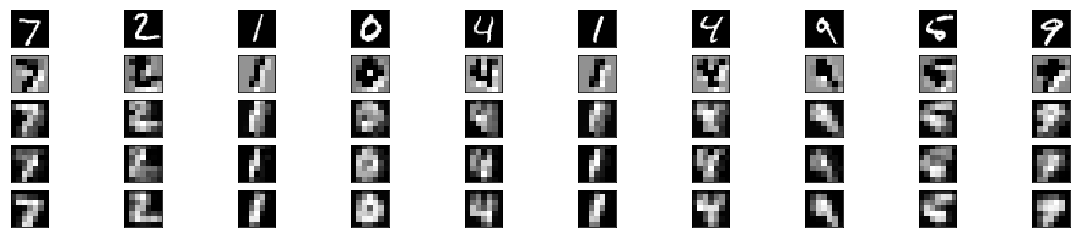

pups


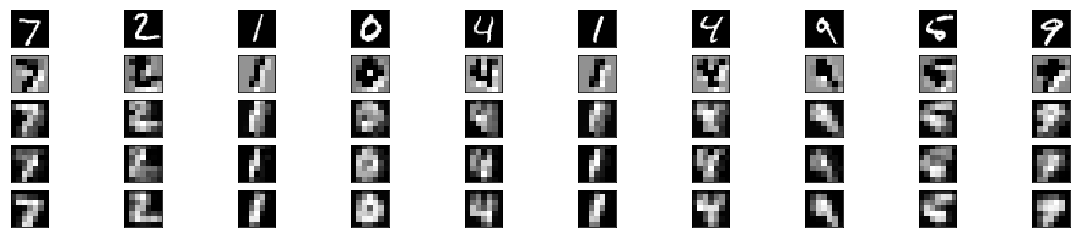

pups
